In [111]:
'''
need to set up env variable before running notebook

terminal command: export PYSYN_CDBS = /Users/tchawla/research/HST_data/grp/redcat/trds
or: point towards correct directory. var name mys be PYSYN_CDBS
'''

import numpy as np
from astropy.io import ascii
from pylab import *
from astropy.table import Table, vstack
import pandas as pd
from expecto import get_spectrum
from scipy.interpolate import RegularGridInterpolator as rgi
from itertools import product
%run Interpolate_final_v2.ipynb
%run GetSpectra_final_v2.ipynb
%run Binning_final_v2.ipynb
%run AddNoise_final_v2.ipynb
import batman

In [10]:
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

'''
reads in .dat files. col1 is wavelength, col2 is transmission. Files are labeled with water content level in mm 
water content levels are listed in the array above. resolution is 200,000.
'''

d = {}
i=0
for n in water_array:
    water_content = str(water_array[i])
    d["data"+water_content] = ascii.read("transmission{0}_hi_res.dat".format(water_content))
    d["data"+water_content+"_pd"] = d["data"+water_content].to_pandas()
    #print(d["data"+water_content+"_pd"])
    i+=1

In [11]:
'''
for loop creates transmission values in shape necessary for interpolation function
'''
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

flux_array = []
i=0
for n in water_array:
    water_array_i = str(water_array[i])
    d["flux"+water_array_i] = np.array(d["data"+water_array_i+"_pd"]["col2"])
    flux_array.append(d["flux"+water_array_i])
    i+=1

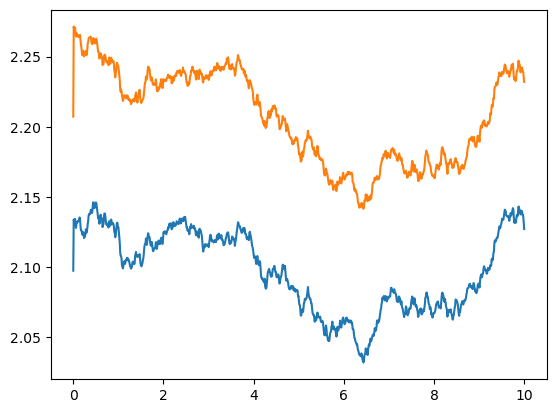

In [12]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 25)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [13]:
water_world_abs1 = ascii.read("water_world_abs1.dat")
water_world_abs2 = ascii.read("water_world_abs2.dat")
water_world_abs3 = ascii.read("water_world_abs3.dat")
water_world_abs4 = ascii.read("water_world_abs4.dat")

hot_jupiter_abs1 = ascii.read("hot_jupiter_abs1.dat")
hot_jupiter_abs2 = ascii.read("hot_jupiter_abs2.dat")
hot_jupiter_abs3 = ascii.read("hot_jupiter_abs3.dat")
hot_jupiter_abs4 = ascii.read("hot_jupiter_abs4.dat")

warm_jupiter_abs1 = ascii.read("warm_jupiter_abs1.dat")
warm_jupiter_abs2 = ascii.read("warm_jupiter_abs2.dat")
warm_jupiter_abs3 = ascii.read("warm_jupiter_abs3.dat")
warm_jupiter_abs4 = ascii.read("warm_jupiter_abs4.dat")

In [109]:
params_hot_jupiter = batman.TransitParams()       #object to store transit parameters
params_hot_jupiter.t0 = 0.                        #time of inferior conjunction
params_hot_jupiter.per = 4.7361                       #orbital period 

# assume rp of .07 for now
params_hot_jupiter.rp = 0.04644                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_hot_jupiter.a = 4.98                        #semi-major axis (in units of stellar radii)
params_hot_jupiter.inc = 85.3                      #orbital inclination (in degrees)
params_hot_jupiter.ecc = 0.                       #eccentricity
params_hot_jupiter.w = 90.                        #longitude of periastron (in degrees)
params_hot_jupiter.limb_dark = "linear"        #limb darkening model
params_hot_jupiter.u = [0.5]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.5, 0.5, 1000)  #times at which to calculate light curve
model_hot_jupiter = batman.TransitModel(params_hot_jupiter, t)    #initializes model

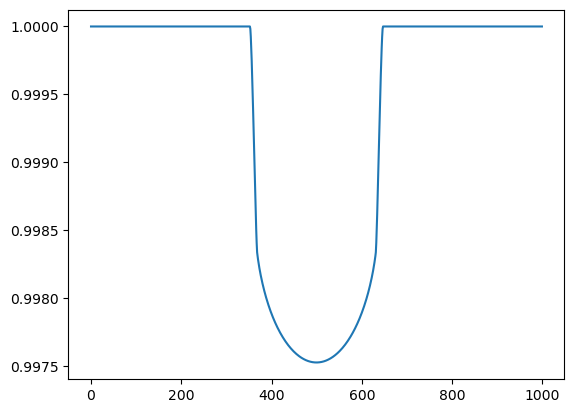

In [110]:

transit = model_hot_jupiter.light_curve(params_hot_jupiter)
plt.plot(transit)

In [15]:
params_warm_jupiter = batman.TransitParams()       #object to store transit parameters
params_warm_jupiter.t0 = 0.                        #time of inferior conjunction
params_warm_jupiter.per = 8.1587289                      #orbital period 

# assume rp of .07 for now
params_warm_jupiter.rp = 0.113                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_warm_jupiter.a = 18.2149                        #semi-major axis (in units of stellar radii)
params_warm_jupiter.inc = 88.55                      #orbital inclination (in degrees)
params_warm_jupiter.ecc = 0.                       #eccentricity
params_warm_jupiter.w = 90.                        #longitude of periastron (in degrees)
params_warm_jupiter.limb_dark = "nonlinear"        #limb darkening model
params_warm_jupiter.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
model_warm_jupiter = batman.TransitModel(params_warm_jupiter, t)    #initializes model

In [16]:
params_water_world = batman.TransitParams()       #object to store transit parameters
params_water_world.t0 = 0.                        #time of inferior conjunction
params_water_world.per = 5.7214742                      #orbital period 

# assume rp of .07 for now
params_water_world.rp = 0.14434                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_water_world.a = 18.164                        #semi-major axis (in units of stellar radii)
params_water_world.inc = 89.56                      #orbital inclination (in degrees)
params_water_world.ecc = 0.                       #eccentricity
params_water_world.w = 90.                        #longitude of periastron (in degrees)
params_water_world.limb_dark = "nonlinear"        #limb darkening model
params_water_world.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
model_water_world = batman.TransitModel(params_water_world, t)    #initializes model

In [19]:
target_spec = spectrum(4000, 8)
ref_spec = spectrum(5000, 9)

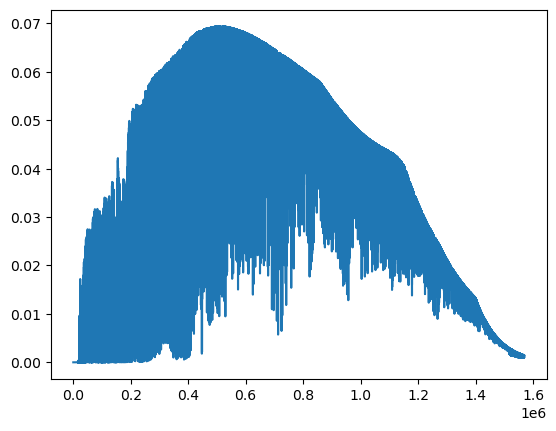

In [91]:
#target_spec[1][1000]
plt.plot(ref_spec[1])

In [25]:
divided_hot_jupiter_abs1 = bin_divide(target_spec, ref_spec, .6, 1, hot_jupiter_abs1, params_hot_jupiter)

In [27]:
normalized_hot_jupiter_abs1 = normalize(divided_hot_jupiter_abs1)

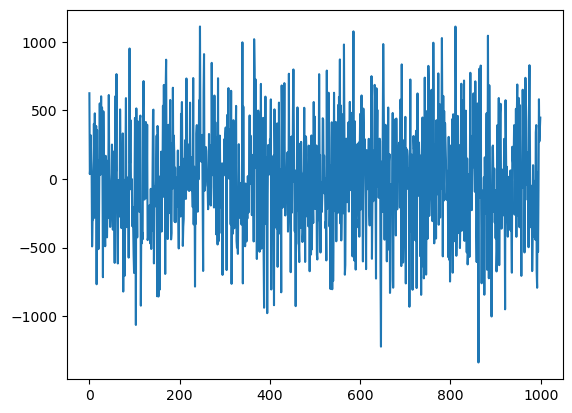

In [158]:
plt.plot(normalized_hot_jupiter_abs1[20]*10**6)

In [57]:
photon = np.array([10**6, 10**5, 10**4, 10**3, 10**2, 10, 1])
target_noise = photon_noise(photon, 180)
target_noise

array([0.99999969, 0.99999962, 0.99999756, 1.00000053, 1.00001406,
       1.00018193, 0.99960582])

In [97]:
photon = np.array([86.63356292, 86.63376699, 86.64872326, 86.67849572, 86.67240005])
target_noise = photon_noise(photon, 90)
target_noise

array([0.999977  , 1.00001322, 0.99999103, 0.99997381, 0.9999767 ])

In [58]:
#hot_jupiter_abs1

In [145]:
%run Model.ipynb

#time = arange(1, 1001, 1)
times = np.linspace(-0.5, 0.5, 1000)

#flux = normalized_hot_jupiter_abs1[0]
#transit

In [159]:
#transit_depth, std_dev_transit_depth, df = fit_lightcurve(times, transit)

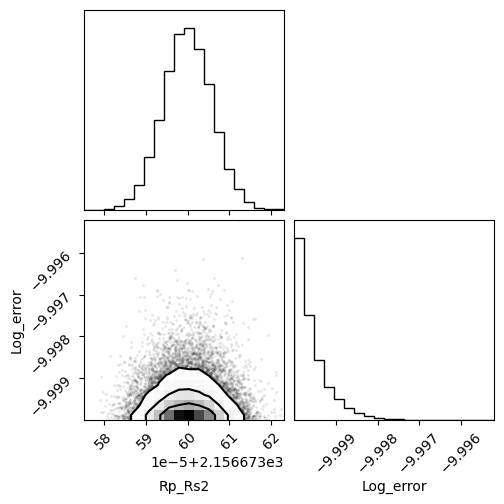

In [147]:
corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [108]:
#"len(time)

In [149]:
#lightcurves need to be normalized to 1, can't be in ppm (same format as batman transit)


60*(1e-5)+2.156673e3

2156.6735999999996

In [155]:
depth = (0.04644**2)
ppm = depth*10**6

ppm

2156.6736

In [103]:
#print(transit*10**4)

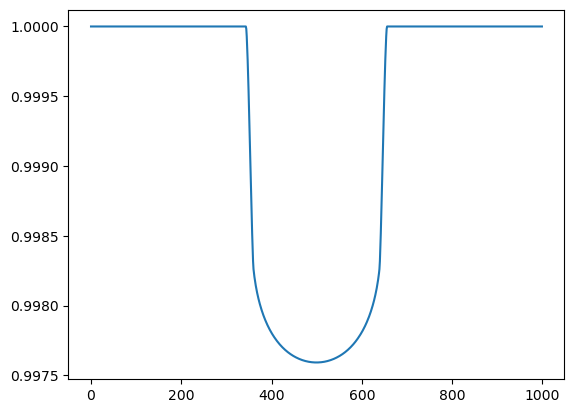

In [104]:
plt.plot(transit)

In [114]:
#t

In [135]:
#transit